In [1]:
from netCDF4 import Dataset

dataset= Dataset('hola.nc', 'w', format='NETCDF4_CLASSIC')
print(dataset.data_model)

NETCDF4_CLASSIC


In [2]:
lat = dataset.createDimension('lat', 73)
lon = dataset.createDimension('lon', 144)
time = dataset.createDimension('time', None)
depth= dataset.createDimension('depth', 30)

In [3]:
import numpy as np

times = dataset.createVariable('time', np.float64, ('time',))
depths = dataset.createVariable('depth', np.float64, ('depth',))
latitudes = dataset.createVariable('latitude', np.float32,('lat',))
longitudes = dataset.createVariable('longitude', np.float32,('lon',)) 
temp = dataset.createVariable('temperature', np.float32, ('time','depth','lat','lon')) 
pH = dataset.createVariable('pH', np.float32, ('time','depth','lat','lon')) 
turb = dataset.createVariable('turbidity', np.float32, ('time','depth','lat','lon')) 


In [4]:
latitudes.units = 'degree_north'
longitudes.units = 'degree_north'
temp.units = 'K'
pH.units = 'pH'
turb.units = 'NTU'
times.units= 'hours since 00:00:00'
times.calendar = 'gregorian'

In [5]:
lats = np.arange(-90,91,2.5)
lons = np.arange(-180,180,2.5)
prof= np.arange(0,300,10)

latitudes[:] = lats
depths[:] = prof
longitudes[:] = lons

In [6]:
numeros = range(0,3)
numeros= list(numeros)
times = numeros
print(times[:])
print("len", len(times))


[0, 1, 2]
len 3


In [7]:
from numpy.random import uniform
nlats= len(dataset.dimensions['lat'])
nlons = len(dataset.dimensions['lon'])
ndepths = len(dataset.dimensions['depth'])
print(ndepths)
temp[0:3,:,:,:] = uniform (size=(3,ndepths,nlats,nlons))
pH[0:3,:,:,:] = uniform (size=(3,ndepths,nlats,nlons))
turb[0:3,:,:,:] = uniform (size=(3,ndepths,nlats,nlons))
print("after adding data", temp.shape)


30
after adding data (3, 30, 73, 144)


In [8]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

In [9]:
slider = widgets.IntSlider(
    value=0,
    min=0,
    max=30,
    readout=True

)

In [10]:
variables= []
for n in dataset.variables.keys():
    if n not in {'time', 'depth', 'latitude', 'longitude'}:
        variables=np.append(variables,n)
    
print(variables)

['temperature' 'pH' 'turbidity']


In [11]:
label_prof=widgets.Label(value='Z')

In [12]:
from datetime import datetime, timedelta
fecha_base= datetime(2015, 1, 1)

drop_var=widgets.Dropdown(
    options=[(variables[n], n) for n in range(len(variables))],
    value=0,
    description='Variables:',
)

drop_date=widgets.Dropdown(
    options=[(str(fecha_base + np.sort(times)[n] *timedelta(hours=24)), n) for n in range(len(times))],
    value=0,
    description='Fecha:',
)

drop_date

Dropdown(description='Fecha:', options=(('2015-01-01 00:00:00', 0), ('2015-01-02 00:00:00', 1), ('2015-01-03 0…

In [13]:
from ipywidgets import Layout, VBox, HBox

box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items='center',
                    width='100%')
slider_layout= Layout(display='flex',
                    flex_flow='column',
                    align_items='center',
                    width='100%')


vb_slider= VBox([label_prof, slider], layout=slider_layout)
hb=HBox([drop_var, drop_date, vb_slider], layout=box_layout)

In [14]:
prof=slider.value
colores=['jet','Wistia', 'binary']
propiedades=[variables[0],times[0],slider.value,colores[0]]

In [15]:
from IPython.display import clear_output


def actualiza_display():
    clear_output(wait=False)
    display(hb)  
    
    fig,(ax1)= plt.subplots(figsize=(13,3), ncols=1)
    im=plt.imshow(dataset.variables[propiedades[0]][propiedades[1],propiedades[2],:,:],\
        cmap= plt.get_cmap(propiedades[3]), aspect='equal', origin='lower')
    plt.colorbar(im,ax=ax1)
    plt.title(propiedades[0]+" of lake")
    plt.ylabel("Latitude")
    plt.xlabel("Longitude")
    plt.show()

def slider_on_change(v):
    propiedades[2]=v['new']
    actualiza_display()
    
def date_on_change(v):
    propiedades[1]=times[v['new']]
    actualiza_display()
    

def variable_on_change(v):
    propiedades[0]=variables[v['new']]
    propiedades[3]=colores[v['new']]
    actualiza_display()
 

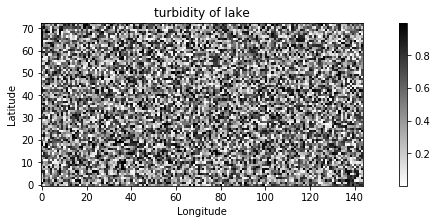

In [16]:
drop_var.observe(variable_on_change, names='value')
drop_date.observe(date_on_change, names='value')
slider.observe(slider_on_change, names='value')

actualiza_display()